In [2]:
#%load_ext snakeviz

# Import data processing modules.
import pandas as pd
import numpy as np

# Import machine learning modules.
import tensorflow as tf
from tensorflow import keras

import wandb
from wandb.keras import WandbCallback

# Import Omphalos modules.
import generate_inputs as gi
import file_methods as fm
import my_metrics as mm
import omphalos_plotter as op
import attributes as attr
import labels as lbls

# Import data visualisation modules.
import seaborn as sns
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [3]:
# Unpickle the saved data set.
test_set = fm.unpickle('test.pickle')
train_set = fm.unpickle('train.pickle')

In [4]:
attributes_df = attr.get_condition(train_set, 'Seawater', mineral_volumes = True, species_concs = True)
labels_df = lbls.secondary_precip(train_set, 'Seawater')
labels_df = labels_df.drop(columns = ['X', 'Y', 'Z'])

ValueError: Length mismatch: Expected axis has 10 elements, new values have 1 elements

In [4]:
test_attributes_df = attr.get_condition(test_set, 'Seawater', mineral_volumes=True, species_concs=True)
test_labels_df = lbls.secondary_precip(test_set, 'Seawater')
test_labels_df = test_labels_df.drop(columns = ['X', 'Y', 'Z'])

In [5]:
labels_df = labels_df['C5H7O2NSO4(s)']
test_labels_df = test_labels_df['C5H7O2NSO4(s)']
test_attributes_df = test_attributes_df.drop(columns = ['C5H7O2NSO4(s)', 'C5H7O2NSO4'], axis=1)
attributes_df = attributes_df.drop(columns = ['C5H7O2NSO4(s)', 'C5H7O2NSO4'], axis=1)

In [6]:
labels_df.describe()
#attributes_df.columns

count    5.000000e+02
mean    -3.072336e-08
std      2.910117e-08
min     -1.722724e-07
25%     -4.207811e-08
50%     -2.225898e-08
75%     -9.592156e-09
max     -1.967287e-12
Name: C5H7O2NSO4(s), dtype: float64

In [7]:
attributes_df.describe()

,FeS(am),FeS34(am),SiO2(am),Quartz,Siderite,Calcite,Calcite44,K-Feldspar,Kaolinite,Fluorapatite,...,B(OH)3(aq),HPO4--,H2S(aq),H2S34(aq),SiO2(aq),Na+,Methane(aq),Cl-,NO3-,Formaldehyde
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.084523,0.080561,0.082304,0.085908,0.083708,0.081395,0.081192,0.081760,0.086510,0.081544,...,0.047558,0.045799,0.047518,0.044225,0.044261,0.043272,0.046671,0.046353,0.043574,0.047448
std,0.075544,0.076540,0.076060,0.079351,0.077600,0.078823,0.075309,0.075690,0.080421,0.071260,...,0.045738,0.045934,0.044417,0.045047,0.043498,0.040018,0.041192,0.045891,0.043329,0.045421
min,0.000083,0.000055,0.000025,0.000046,0.000003,0.000074,0.000100,0.000155,0.000076,0.000151,...,0.000048,0.000192,0.000012,0.000218,0.000106,0.000086,0.000187,0.000125,0.000056,0.000032
25%,0.027367,0.022413,0.028111,0.027552,0.026075,0.024963,0.024786,0.024123,0.027914,0.024535,...,0.013131,0.012836,0.015719,0.012975,0.012547,0.014326,0.015564,0.013746,0.012826,0.015223
50%,0.064520,0.055590,0.059812,0.062277,0.063654,0.054457,0.061849,0.060501,0.062298,0.063814,...,0.033548,0.029998,0.034988,0.030931,0.031797,0.030790,0.034373,0.033768,0.029988,0.032632
75%,0.119706,0.109530,0.113323,0.123060,0.116188,0.113068,0.110887,0.118249,0.120584,0.118356,...,0.068433,0.063774,0.068096,0.058927,0.064410,0.060996,0.066525,0.064137,0.058852,0.063309
max,0.528274,0.388858,0.470331,0.408823,0.517390,0.424438,0.485630,0.490885,0.420563,0.360400,...,0.326957,0.291837,0.302468,0.304412,0.318790,0.229551,0.242865,0.307450,0.248654,0.270848


In [ ]:
visualise = attributes_df
#visualise['Ca++_out'] = labels_df['Ca++']
#visualise['Ca44++_out'] = labels_df['Ca44++']
#visualise['delCa++_out'] = labels_df['delCa++']
#visualise['SO4--_out'] = labels_df['SO4--']
#visualise['S34O4--_out'] = labels_df['S34O4--']
#visualise['delSO4--_out'] = labels_df['delSO4--']
#visualise['calcite_precip'] = net_precip['calcite_precip']
visualise['C5H7O2NSO4(s)'] = labels_df
display(visualise.head())

f, ax = plt.subplots(figsize=(20, 18))
corr = visualise.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Species Correlation Heatmap', fontsize=14)

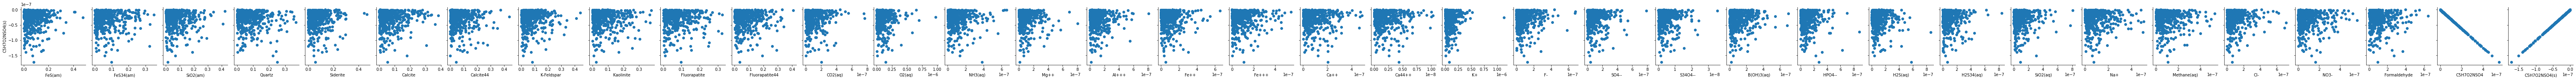

In [63]:
g = op.scatter_attributes(visualise, attributes=attributes_df.columns, labels='C5H7O2NSO4(s)')

In [8]:
# Generate training arrays.
#labels_df = labels_df[['delSO4--', 'delCa++']]
#test_labels_df = test_labels_df[['delSO4--', 'delCa++']]

x_train = attributes_df.to_numpy()
y_train = labels_df.to_numpy()

x_test = test_attributes_df.to_numpy()
y_test = test_labels_df.to_numpy()

for array in [x_train, y_train, x_test, y_test]:
    print(np.shape(array))

(500, 34)
(500,)
(50, 34)
(50,)


In [10]:
metrics = mm.generate_metrics('delCa++', 'delSO4--', labels=labels_df)

{'delCa++': <my_metrics.SpeciesRmse object at 0x149bf2670>, 'delSO4--': <my_metrics.SpeciesRmse object at 0x146923280>}


In [18]:
def train():
    # wandb configuration
    wandb.init(project="box-model-normalisation-test")

    # Hyperparameters defaults.
    wandb.config.dropout = 0.2
    wandb.config.learning_rate = 0.1
    wandb.config.epochs = 100
    wandb.config.batch_size = 50

    # Define the model geometry.
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.1)),
    tf.keras.layers.Dropout(wandb.config.dropout),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.1)),
    tf.keras.layers.Dense(1)
    ])

    # Compile the model.
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=wandb.config.learning_rate),
              loss=tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error"),
                 metrics=[])

    # Split the dataset into features and label.
    model.fit(x=x_train, y=y_train, batch_size=wandb.config.batch_size, epochs=wandb.config.epochs, validation_data = (x_test, y_test), shuffle=True, verbose=0, callbacks=[WandbCallback()])

In [19]:
train()